# Topic Modeling with responses to stat based questions.
Question 3: What is the IV Effect and waht role does it play in statistical inference?

# Importing the necessary packages
### Use chunk below in terminal to install Scikit learn
python -m venv sklearn-env
sklearn-env\Scripts\activate  # activate
pip install -U scikit-learn

### Use chunk below to verify the installation
python -m pip show scikit-learn  
python -m pip freeze   
python -c "import sklearn; sklearn.show_versions()"

In [18]:
import json

def load_data(file):
    with open(file, "r", encoding = "utf-8") as f:
        data = json.load(f)
    return(data)



In [19]:
Stats_data = load_data(r"C:\Users\isaia\OneDrive\Desktop\Academic work\Scholarly activities\Research voluntering\Research voluntering 2024 Dr. Sanocki\Stats & LLM\Topic-modeling\Stats_T.M_LDA\Data\Json Format\Sanocki_Stats_Data.json")

for key in list(Stats_data.keys())[:5]:
   print(key, Stats_data[key])
        

ID_code ['O.A', 'I.A', 'J.B', 'P.C', 'K.C', 'A.C', 'A.G', 'A.K', 'K.K', 'E.L', 'C.MD', 'S.M', 'O.P', 'T.P', 'A.Q', 'A.R', 'E.R', 'G.T', 'S.T']
Question 1 ['Error helps determine the strength of the experiment and the power to reject the null hypothesis.', 'The role that error plays in statistical inference has to do with type one and type two error. Error helps us determine our null hypothesis. Meaning, did our results occur as a result of the independent variable? Or did it occur by chance, or error.', 'Error plays a role in statistical inference by showing between and within group differences. Error also shows where the data differs. In stats, error is always involved and is a part of many aspects of stats.', 'Error lets you know if the results of the study were purely due to chance. Error describes the difference WITHIN groups.', 'Error allows us to gain knowledge on a population and what has statistical significance.', "The role that error plays in statistical inference is that an 

In [20]:
print(Stats_data.keys()) 
ID_code = Stats_data["ID_code"]
Question_3 = Stats_data["Question 3"]   

dict_keys(['ID_code', 'Question 1', 'Question 2', 'Question 3'])


In [21]:
# Checking the newlly created variables & there length
print(ID_code[0])
print(Question_3[0])
print()
print("Total number of participants in ID code:", len(ID_code))
print("Total number of responses for question 1:", len(Question_3))


O.A
IV effect is the difference between the sample means. It indicates the error within the samples relative to the population mean.

Total number of participants in ID code: 19
Total number of responses for question 1: 19


In [22]:
import string 
from nltk.corpus import stopwords  

custom_stopwords = ["also", "occur", "lets", "us", "likely", "would", "make", "may", "know", "aka", "ok", "versa", "vice", "well", "way"]
stops = stopwords.words("english") + custom_stopwords  

def clean_docs(docs):
    stops = stopwords.words("english")

    final = [] 
 
    for doc in docs:
        clean_doc = remove_stop_punc(doc, stops)
        final.append(clean_doc)

    return(final)    


def remove_stop_punc(text, stops):
    words = text.split()
    final = []
    for word in words:
        if word.lower() not in stops:
            final.append(word) 

    final = " ".join(final)

    final = "".join([i for i in final if not i.isdigit()])

    final = final.replace("/", " ")

    final = final.replace("-", " ")

    final = final.translate(str.maketrans("", "", string.punctuation + "()"))

    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

In [23]:
cleaned_Question_3 = clean_docs(Question_3)
cleaned_Question_3 = [remove_stop_punc(doc, stops) for doc in cleaned_Question_3]

print("Original Q3 data:")
print(Question_3[0] + "\n")

print("Cleaned Q3 data:")
print(cleaned_Question_3[0] + "\n")


Original Q3 data:
IV effect is the difference between the sample means. It indicates the error within the samples relative to the population mean.

Cleaned Q3 data:
IV effect difference sample means indicates error within samples relative population mean



In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer( 
                                lowercase = True,
                                max_features = 300,
                                max_df = .75,
                                min_df = 1,
                                ngram_range = (1, 1),
                                stop_words = "english"
)

vectors_Q3 = vectorizer.fit_transform(cleaned_Question_3)

print(vectors_Q3[0:1])


  (0, 31)	0.19028459077430973
  (0, 107)	0.3005476203407788
  (0, 75)	0.19028459077430973
  (0, 58)	0.415952074833915
  (0, 35)	0.27758469048432416
  (0, 108)	0.32865197512390054
  (0, 97)	0.415952074833915
  (0, 87)	0.3648847901943386
  (0, 73)	0.415952074833915


In [25]:
feature_names = vectorizer.get_feature_names_out() 

sparse_vectors_scores = vectors_Q3[0]

for index, score in zip(sparse_vectors_scores.indices, sparse_vectors_scores.data):
    print("word:", feature_names[index], "---> TF-IDF Score:", {score})

word: difference ---> TF-IDF Score: {0.19028459077430973}
word: sample ---> TF-IDF Score: {0.3005476203407788}
word: means ---> TF-IDF Score: {0.19028459077430973}
word: indicates ---> TF-IDF Score: {0.415952074833915}
word: error ---> TF-IDF Score: {0.27758469048432416}
word: samples ---> TF-IDF Score: {0.32865197512390054}
word: relative ---> TF-IDF Score: {0.415952074833915}
word: population ---> TF-IDF Score: {0.3648847901943386}
word: mean ---> TF-IDF Score: {0.415952074833915}


In [26]:
dense = vectors_Q3.todense()
print(dense[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.19028459 0.         0.         0.         0.27758469
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.41595207 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.41595207 0.         0.19028459 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36488479 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.41595207 0.      

In [27]:
dense_list = dense.tolist()
print(dense_list[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19028459077430973, 0.0, 0.0, 0.0, 0.27758469048432416, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.415952074833915, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.415952074833915, 0.0, 0.19028459077430973, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3648847901943386, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.415952074833915, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3005476203407788, 0.32865197512390054, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [28]:
all_keywords = []
for description in dense_list:
    x = 0
    keywords = []
    for word in description:
        if word > .25:
            keywords.append(feature_names[x])
        x += 1
    all_keywords.append(keywords)

print ("Original Text:")
print (Question_3[0]+"\n")

print ("Cleaned Text:")
print (cleaned_Question_3[0]+"\n")

print ("Only Keywords Text:")
print (all_keywords[0])

Original Text:
IV effect is the difference between the sample means. It indicates the error within the samples relative to the population mean.

Cleaned Text:
IV effect difference sample means indicates error within samples relative population mean

Only Keywords Text:
['error', 'indicates', 'mean', 'population', 'relative', 'sample', 'samples']


In [29]:
true_k = min(2, len(vectors_Q3.toarray()) // 2)  

model = KMeans(
    n_clusters = true_k,         
    init = "random",   
    max_iter = 100,        
    n_init = 50,          
    random_state = 1      
)

model.fit(vectors_Q3)  

order_centroids = model.cluster_centers_.argsort()[:, ::-1]  

terms = vectorizer.get_feature_names_out()

print("Top words for each cluster")
for i in range(true_k):
    top_words = [terms[ind] for ind in order_centroids[i, :5]]  
    print(f"Cluster {i + 1}: {', '.join(top_words)}")


Top words for each cluster
Cluster 1: difference, means, groups, shows, samples
Cluster 2: variable, independent, inference, statistical, data


In [30]:
i = 0 
for clusters in order_centroids:
    print(f"Cluster {i}")
    for keyword in clusters[0:5]:
        print(terms[keyword])
    print("")
    i = i + 1

Cluster 0
difference
means
groups
shows
samples

Cluster 1
variable
independent
inference
statistical
data



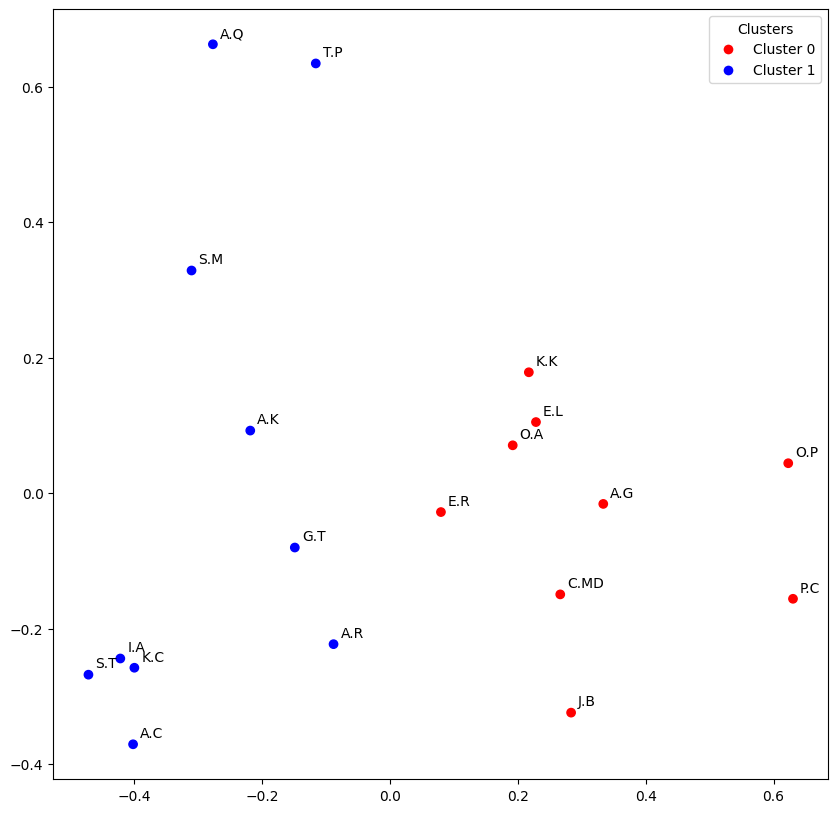

ID: O.A| Keywords: error, indicates, mean, population, relative, sample, samples
ID: I.A| Keywords: chance, error, experiment, higher, independent, looking, lower, using, variable
ID: J.B| Keywords: difference, experiment, finding, groups, plays, role, shows, test
ID: P.C| Keywords: difference, groups, means, shows
ID: K.C| Keywords: applied, changed, data, independent, set, signifigance, variable
ID: A.C| Keywords: affected, inference, observed, outcome, present, research, results, significance, statistical
ID: A.G| Keywords: average, sample, samples, shows, subtract
ID: A.K| Keywords: accurate, allows, causality, data, predictions, providing, relationship, relationships, represent, representation, sets
ID: K.K| Keywords: data, difference, means, used, value
ID: E.L| Keywords: caused, change, dv, tells
ID: C.MD| Keywords: big, difference, groups, interference, lead, measure
ID: S.M| Keywords: hypothesis, percieved, researchers, statistically
ID: O.P| Keywords: difference, means
ID: T.

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

kmean_indices = model.predict(vectors_Q3)

num_components = min(2, len(vectors_Q3.toarray()))  
pca = PCA(n_components=num_components)
scatter_plot_points = pca.fit_transform(vectors_Q3.toarray())

colors = ["red", "blue"]

num_clusters = len(set(kmean_indices))  
cluster_colors = colors[:num_clusters]  

x_axis = scatter_plot_points[:, 0]
y_axis = scatter_plot_points[:, 1]

fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(x_axis, 
                     y_axis, 
                     c=[colors[d] for d in kmean_indices]
                     )

for i, txt in enumerate(ID_code):
    ax.annotate(txt[0:11], 
                (x_axis[i], 
                 y_axis[i]), 
                textcoords="offset points", 
                xytext=(5,5), 
                fontsize = 10)


handles = [plt.Line2D([0],[0],
                        marker = "o",
                        color = "w",
                        markerfacecolor = colors[i],
                        markersize = 8) for i in range(num_clusters)
            ]

ax.legend(handles, 
          [f"Cluster {i}" for i in range(num_clusters)], 
          title = "Clusters")

# Show Plot
plt.show()

for id_code, keywords in zip(ID_code, all_keywords):
    print(f"ID: {id_code}| Keywords: {', '.join(keywords)}")